# O'Reilly Introduction to segmentation
What exactly do we mean by segmentation? Segmenting an image is the process of breaking down an image into smaller regions that individually hold meaningful information and help us understand the overall content of the image.

## Contour detection
Let's start with one of the easiest techniques of segmentation—contours. Simply put, contours are nothing but boundaries of objects in an image. Say, for example, you have different types of bottles in an image and you want to segment out each one of them. 
- The contour detection algorithm will try to trace out the boundaries for each bottle and form a closed loop.
- Each closed loop in the image represents a contour.
- You might wonder, aren't contours similar to edges? There is a very subtle difference between them — **contours always form closed loops whereas edges can remain open**.

## The Watershed algorithm
1. Read the image that you want to segment.
2. Convert it into grayscale (only if it is not in grayscale already).
1. Convert the image pixel values to unsigned int using the `img_as_ubyte()` function. This is because the gradient function expects the image in a certain format.
1. Calculate the local gradients of the image.
1. Apply the Watershed algorithm.

In [2]:
from scipy import ndimage as ndi
from skimage.morphology import watershed, disk
from skimage import data
from skimage.io import imread
from skimage.filters import rank
from skimage.color import rgb2gray
from skimage.util import img_as_ubyte

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from skimage import io

In [33]:
image = data.astronaut()
gray = rgb2gray(image)

image = img_as_ubyte(gray)

# Calculate the local gradients of the image and only select the points that have a gradient value of less than 20
markers = rank.gradient(image, disk(5)) < 20
markers = ndi.label(markers)[0]

gradient = rank.gradient(image, disk(2))

# Watershed Algorithm
labels = watershed(gradient, markers)

/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


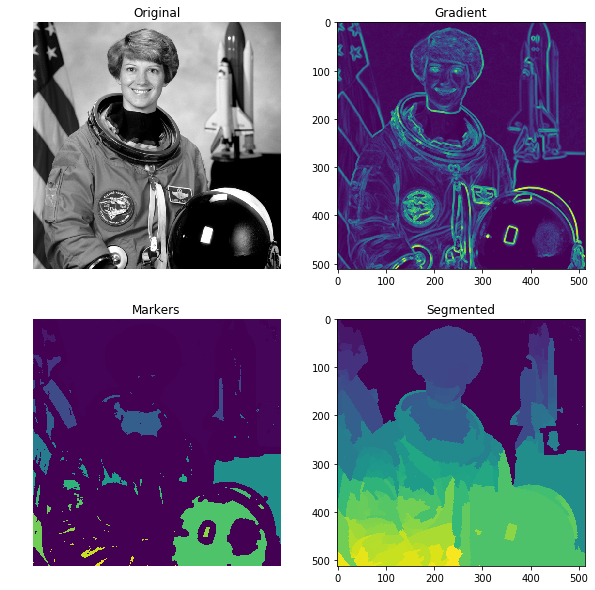

In [34]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

ax[0, 0].imshow(image, cmap=plt.cm.gray)
ax[0, 0].set_title('Original')

ax[0, 1].imshow(gradient)
ax[0, 1].set_title('Gradient')

ax[1, 0].imshow(markers)
ax[1, 0].set_title('Markers')

ax[1, 1].imshow(labels)
ax[1, 1].set_title('Segmented')

for a in ax[:, 0]:
    a.axis('off')
plt.show()

## Superpixels
Images are always dealt with by the granularity of a pixel. But this can sometimes be computationally expensive. You do not always want to iterate through all the pixels in the image. 
- As an attempt to remove redundancy in the pixels of an image, we try to combine pixels closer to each other that have the same color value into a cluster and then call those clusters superpixels. 
- The advantage of doing this is that now instead of going through a few pixels we just go through one superpixel, which is nothing but a combination of these pixels.

In [11]:
from skimage import segmentation, color
from skimage.future import graph

Text(0.5,1,'Superpixeled')

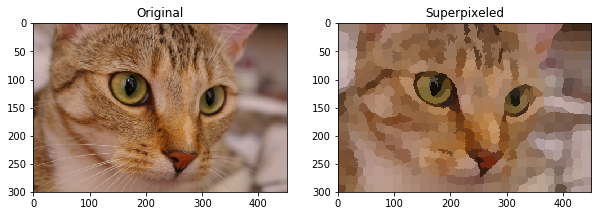

In [23]:
image = data.chelsea()

img_segments = segmentation.slic(image, compactness=20, n_segments=500)
superpixels = color.label2rgb(img_segments, image, kind='avg')

fig, ax = plt.subplots(ncols=2, figsize=(10, 10))

ax[0].imshow(image, cmap=plt.cm.gray)
ax[0].set_title('Original')

ax[1].imshow(superpixels)
ax[1].set_title('Superpixeled')

## Normalized graph cut
This is one of the most popular image segmentation techniques today. 
- The simplest explanation of the graph cut technique is that each pixel in the image is treated as a node.
- Apart from these nodes, we have some extra nodes that each represent, say an object in the image.
- All the pixels are connected to all of its adjacent pixels and each to the object nodes. 


1. Read the image.
2. Perform k-means clustering over color values. In our implementation, we use the SLIC method for clustering.
3. Using the clustered pixels from the previous step, we create a weighted graph over these clusters. The weight of each edge is determined by how similar two regions are.
4. We apply the normalized graph cut technique over the graph obtained in the last step.

In [24]:
from skimage import data, segmentation, color
from skimage.io import imread
from skimage import data
from skimage.future import graph